# Task 2a Visualization

In [14]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [15]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
# Read data
img1 = cv2.imread("../data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("../data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

keypoints1 = np.loadtxt("./keypoints1.in")
keypoints2 = np.loadtxt("./keypoints2.in")
keypoints1 = torch.tensor(keypoints1, device=device)
keypoints2 = torch.tensor(keypoints2, device=device)

descriptors1 = np.loadtxt("./descriptors1.in")
descriptors2 = np.loadtxt("./descriptors2.in")
descriptors1 = torch.tensor(descriptors1, device=device)
descriptors2 = torch.tensor(descriptors2, device=device)

## Visualize Matches

tensor([ 60,  64, 156, 169, 242, 291, 389])


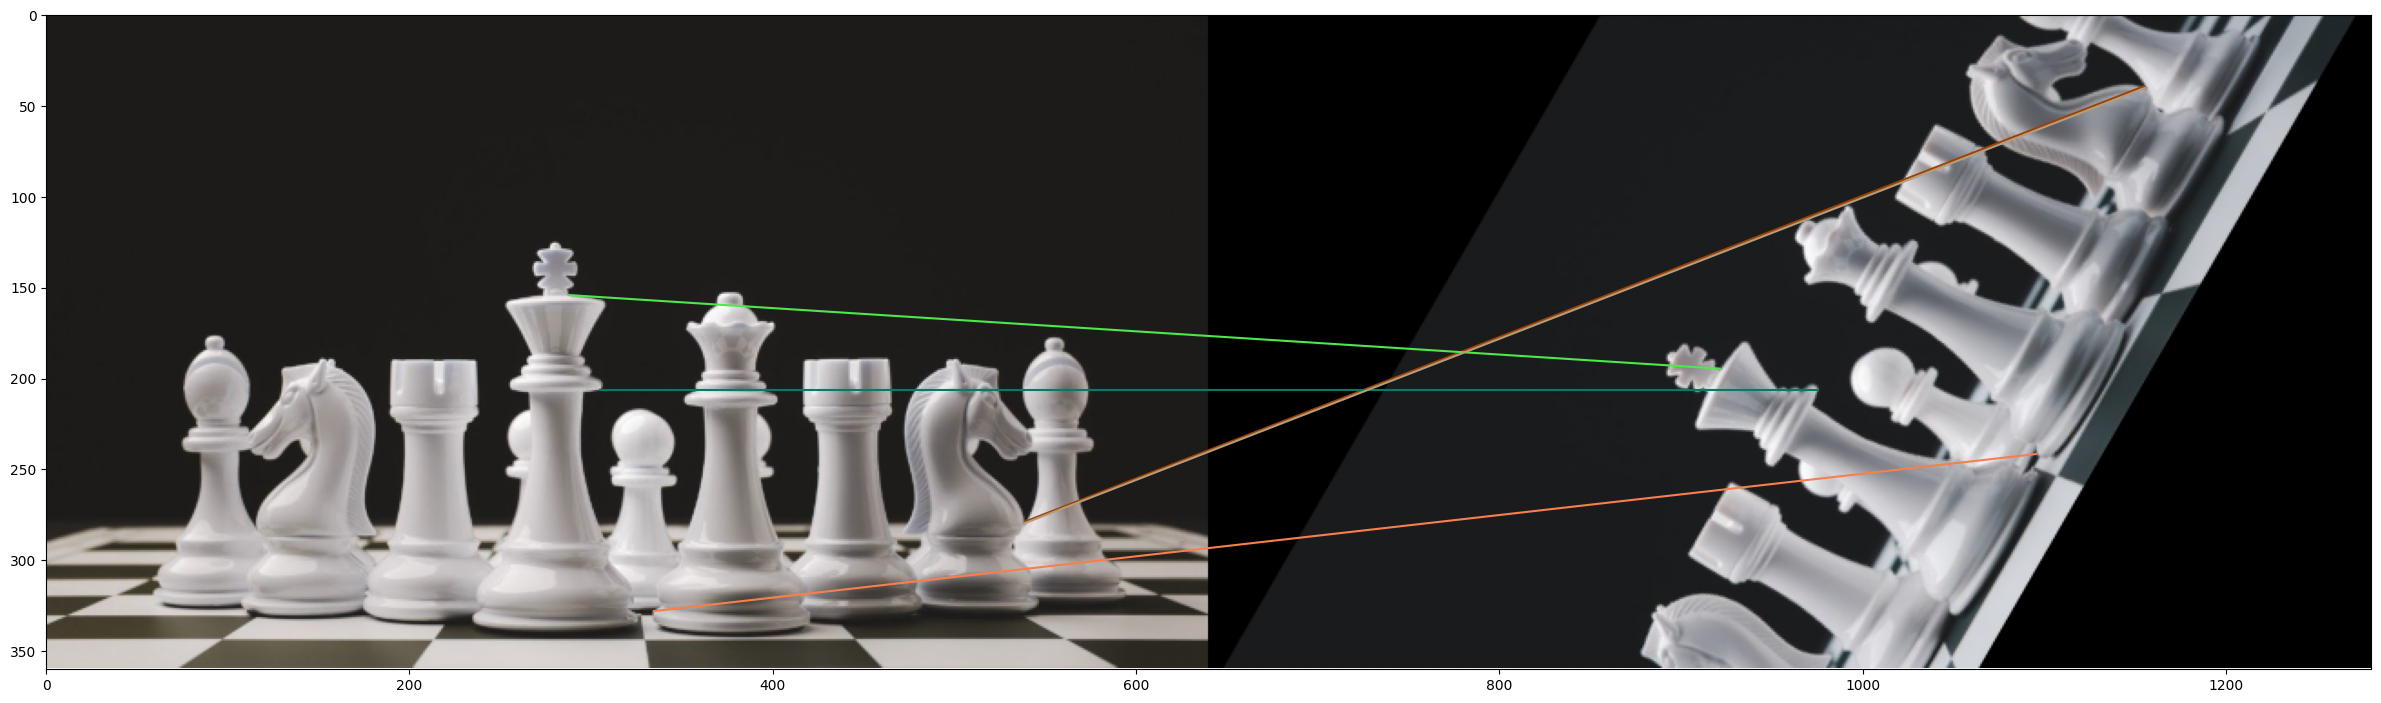

In [18]:
from skimage.feature import plot_matches
import matplotlib.pyplot as plt
import cv2

sys.path.append('..')

from task2a.match import match

matches = match(
        descriptors1=descriptors1,
        descriptors2=descriptors2,
        device=device,
        dist="hamming",
        ratio=0.95,
        threshold=10,
    )


fig, axs = plt.subplots(figsize=(30.0, 20.0))
k = 5
plot_matches(
    axs,
    img1,
    img2,
    keypoints1.cpu(),
    keypoints2.cpu(),
    matches[:k, :],
    alignment="horizontal",
    only_matches=True,
)

plt.show()